<a href="https://colab.research.google.com/github/opoluliakh/data-analytics-learning/blob/main/Poluliakh_HW1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [4]:

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
print("Розмір даних:", df.shape)

print(df.head())

print("Мінімальна дата:", df.index.min())
print("Максимальна дата:", df.index.max())

print("Різниця між двома першими датами:", df.index[1] - df.index[0])


Розмір даних: (10886, 19)
                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2011-01-01 04:00:00   

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


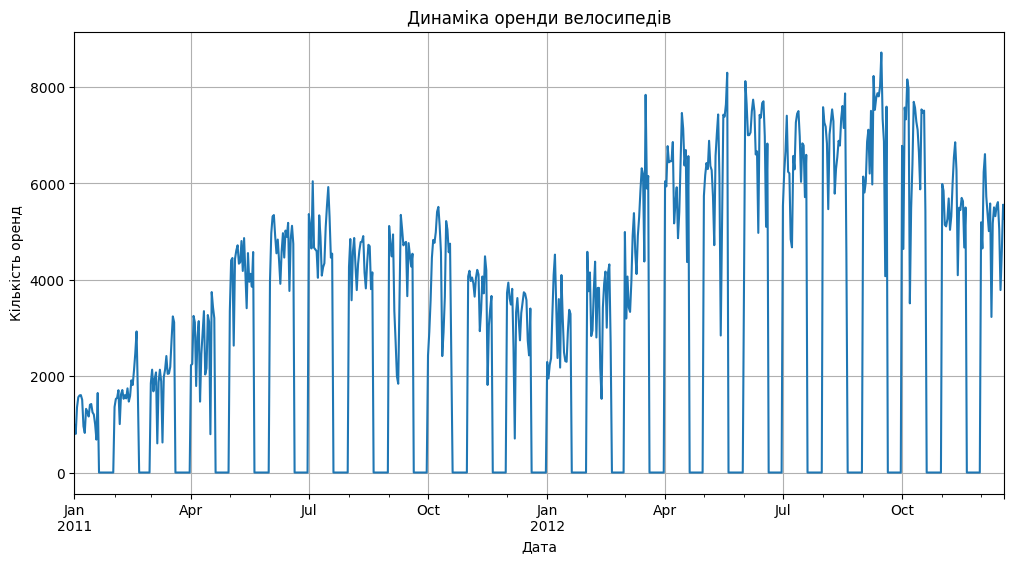

In [6]:
daily_rentals = df.resample('D')['count'].sum()


ax = daily_rentals.plot(figsize=(12,6), title="Динаміка оренди велосипедів")
ax.set_ylabel("Кількість оренд")
ax.set_xlabel("Дата")
plt.grid(True)
plt.show()


1. **Причина “заломів”**. Графік дуже "рваний", бо показані поденні значення, а кількість оренд сильно коливається залежно від погоди, дня тижня та свят. Також це може вказувати на те, що в певні дні дані не збиралися (пропуски) або сервіс фактично не працював.
2. **Загальні тенденції.** Від початку 2011 року оренди поступово зростають, отже сервіс стає популярнішим. А у другій половині 2012 року середній рівень оренд вищий, ніж у 2011.
3. **Сезонність.** В теплі періоди оренди різко зростають (піки влітку). Узимку кількість оренд значно падає, іноді майже до нуля (через холод і сніг).
4. **Аномалії.** Надто низькі значення (0–500) у розпал сезону виглядають як аномальні і можуть бути спричинені проблемами в даних (пропуски, технічні збої). А надто високі піки можуть збігатися з вихідними, святами чи акціями сервісу.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

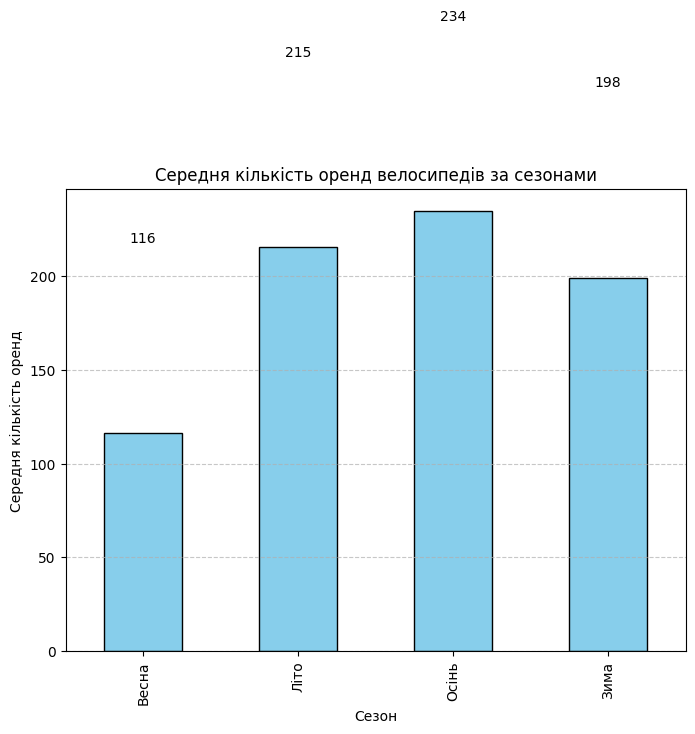

In [12]:
season_map = {1: "Весна", 2: "Літо", 3: "Осінь", 4: "Зима"}

seasonal_data = df.groupby("season")["count"].mean().rename(index=season_map)

ax = seasonal_data.plot(kind="bar", figsize=(8,6), color="skyblue", edgecolor="black")

for i, val in enumerate(seasonal_data):
    ax.text(i, val + 100, int(val), ha='center', va='bottom', fontsize=10)

plt.title("Середня кількість оренд велосипедів за сезонами")
plt.xlabel("Сезон")
plt.ylabel("Середня кількість оренд")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**У який сезон найбільше оренд? **Найвищі значення спостерігаються восени (234 оренди в середньому на день). Друге місце — літо (215 оренд). Найменше — весна (116 оренд).

**Пояснення сезонності.** Восени та влітку сприятливі погодні умови (помірна температура, суха погода), що робить катання комфортним. Узимку попит нижчий (198), але він вищий, ніж навесні — можливо, через тепліші зимові дні або активність постійних користувачів. Навесні попит ще невисокий, оскільки погода може бути нестабільною, прохолодною і дощовою.

**Наскільки відрізняються сезони?** Різниця між найпопулярнішим сезоном (осінь — 234) і найменш популярним (весна — 116) становить приблизно у 2 рази. Це показує суттєву залежність оренд від погодних умов та часу року.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


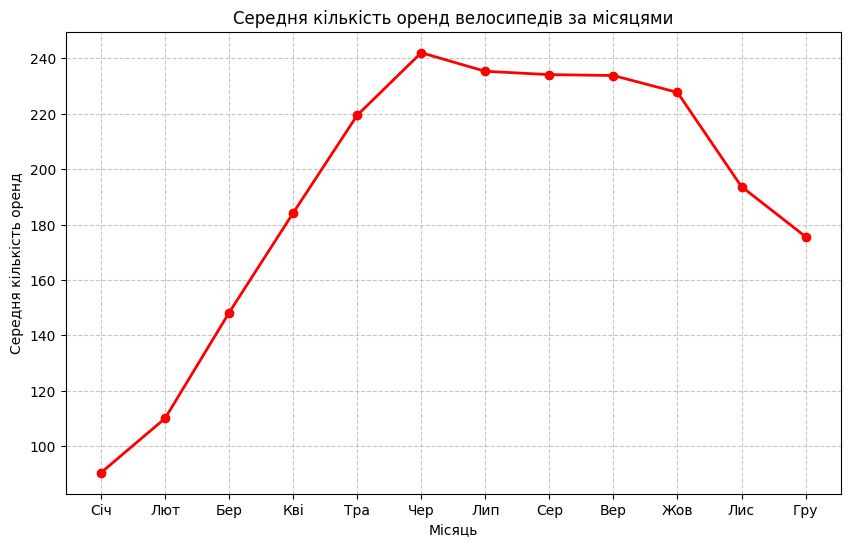

In [9]:
monthly_data = df.groupby("month")["count"].mean()

months = {
    1: "Січ", 2: "Лют", 3: "Бер", 4: "Кві", 5: "Тра", 6: "Чер",
    7: "Лип", 8: "Сер", 9: "Вер", 10: "Жов", 11: "Лис", 12: "Гру"
}

plt.figure(figsize=(10,6))
plt.plot(monthly_data.index, monthly_data.values, marker="o", color="red", linewidth=2)
plt.xticks(range(1,13), [months[m] for m in range(1,13)])
plt.title("Середня кількість оренд велосипедів за місяцями")
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


**У які місяці спостерігається пік та спад оренди?** Найменше оренд у січні (близько 90) та лютому (110). Попит поступово зростає з березня і досягає максимуму у червні (понад 240 оренд).Високі показники зберігаються влітку й на початку осені, а з жовтня починається спад.

**Чи збігається закономірність із попереднім завданням?** Так, логіка збігається: найвищий попит у теплі місяці (літо–осінь), найнижчий — узимку. Проте графік за місяцями деталізує сезонний аналіз і показує, що саме червень є піковим місяцем.

**Як клімат впливає на оренду велосипедів?** У теплі, сухі місяці (травень–вересень) попит стабільно високий. Узимку оренди падають через холод, сніг та короткий світловий день. Перехідні місяці (березень–квітень, жовтень–листопад) показують поступові зміни попиту, що відповідає погодним умовам.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

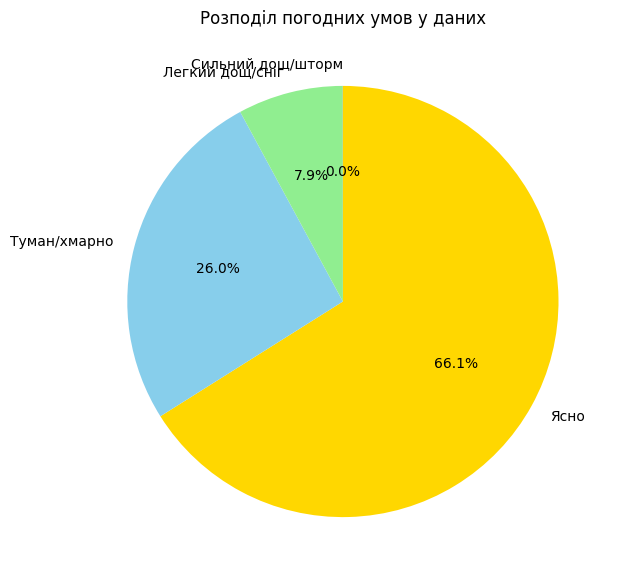

In [11]:
weather_map = {
    1: "Ясно",
    2: "Туман/хмарно",
    3: "Легкий дощ/сніг",
    4: "Сильний дощ/шторм"
}


weather_counts = df["weather"].value_counts(normalize=True) * 100
weather_counts = weather_counts.rename(index=weather_map)


colors = ["#FFD700", "#87CEEB", "#90EE90", "#FF6347"]
plt.figure(figsize=(7,7))
plt.pie(
    weather_counts,
    labels=weather_counts.index,
    autopct="%.1f%%",
    colors=colors,
    startangle=90,
    counterclock=False
)
plt.title("Розподіл погодних умов у даних")
plt.show()


**Яка погода переважає?** У більшості випадків погода була ясною (66.1%). На другому місці — туман/хмарно (26%).

**Чи є дні із сильним дощем?** Категорія “Сильний дощ/шторм” займає 0%, тобто таких днів у вибірці практично немає. Легкий дощ чи сніг зустрічається рідко — 7.9% випадків.

**Як погода впливає на оренду?** Ясна погода створює найбільш сприятливі умови для поїздок, тому попит на велосипеди найвищий. При хмарності чи тумані кількість оренд знижується, але попит зберігається.Під час дощу чи снігу попит різко падає, а в умовах сильного дощу — практично зникає.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

<Figure size 1000x600 with 0 Axes>

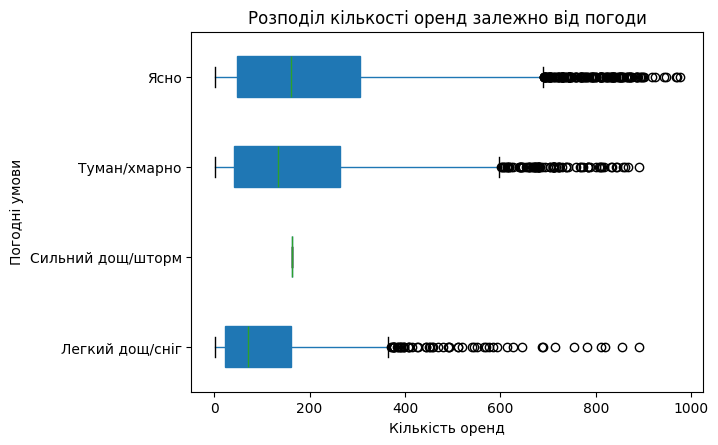

In [14]:
weather_map = {
    1: "Ясно",
    2: "Туман/хмарно",
    3: "Легкий дощ/сніг",
    4: "Сильний дощ/шторм"
}


df["weather_label"] = df["weather"].map(weather_map)


plt.figure(figsize=(10,6))
df.boxplot(
    column="count",
    by="weather_label",
    vert=False,
    grid=False,
    patch_artist=True
)
plt.title("Розподіл кількості оренд залежно від погоди")
plt.suptitle("")
plt.xlabel("Кількість оренд")
plt.ylabel("Погодні умови")
plt.show()


**При якій погоді найбільший розкид у кількості оренд?** Найбільший розкид значень спостерігається за ясної погоди. Адже у сонячні дні бувають як будні з невеликим попитом, так і вихідні чи святкові дні з дуже високим попитом.

**Чи є викиди (outliers) у даних?** Так, викидів дуже багато, особливо за ясної та туманної/хмарної погоди — це дні з аномально високим попитом (піки). При легкому дощі також видно поодинокі викиди, але вони рідші. При сильному дощі/штормі вибірка маленька, тому майже без виражених викидів.

**При якій погоді медіанне значення найвище?** Найвища медіана кількості оренд — за ясної погоди. Дещо нижча — при тумані/хмарності. Значно нижча — при легкому дощі/снігу. Мінімальна — при сильному дощі/штормі.

Очікуваний результат:

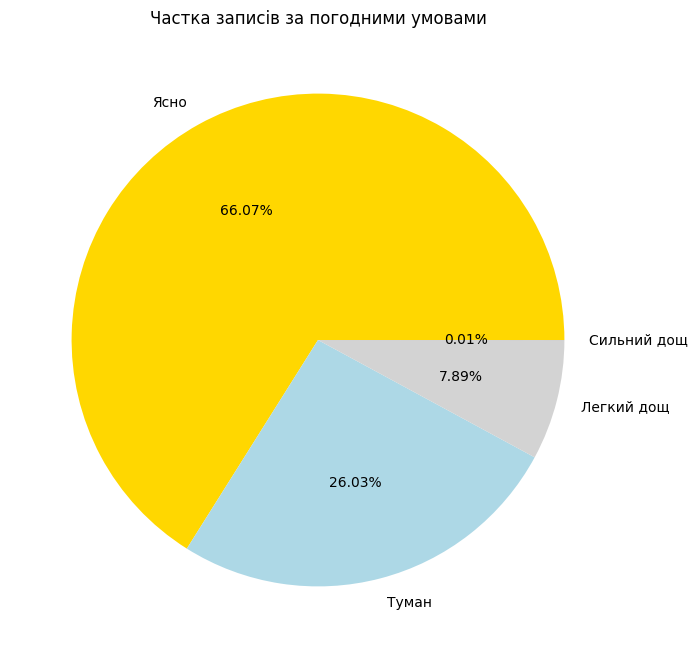

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

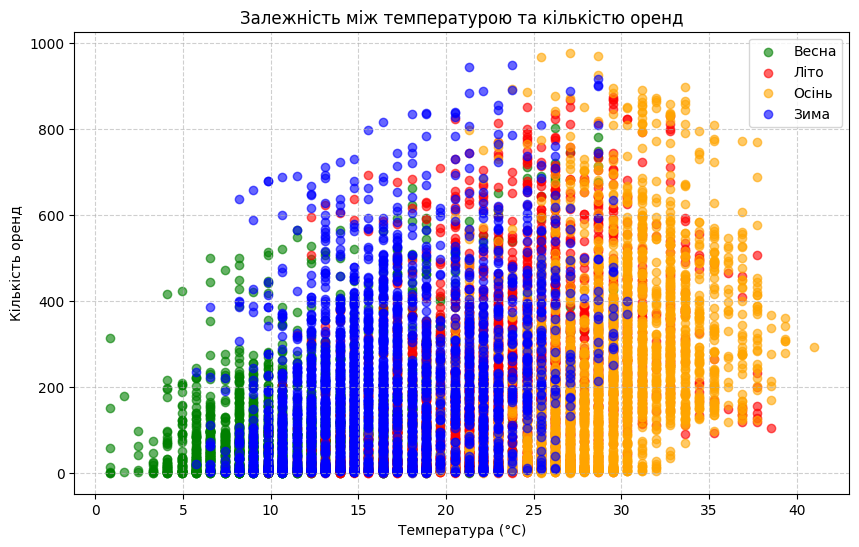

In [15]:
season_colors = {1: "green", 2: "red", 3: "orange", 4: "blue"}
season_map = {1: "Весна", 2: "Літо", 3: "Осінь", 4: "Зима"}

plt.figure(figsize=(10,6))

for s in df["season"].unique():
    subset = df[df["season"] == s]
    plt.scatter(
        subset["temp"],
        subset["count"],
        alpha=0.6,
        c=season_colors[s],
        label=season_map[s]
    )

plt.title("Залежність між температурою та кількістю оренд")
plt.xlabel("Температура (°C)")
plt.ylabel("Кількість оренд")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Ми бачимо чіткий позитивний зв’язок: зі зростанням температури кількість оренд зростає. При низьких температурах (0–10 °C) оренд дуже мало. Найбільша кількість оренд спостерігається при температурі 15–30 °C — комфортний діапазон для поїздок.

Взимку (сині точки) попит обмежений навіть за відносно прийнятної температури. Влітку (червоні) та восени (оранжеві) при 20–30 °C попит найвищий. Навесні (зелені) спостерігається поступове зростання попиту з підвищенням температури.

Також варто додати, що при дуже високих температурах (>35 °C) кількість оренд трохи знижується — можливо, спека робить катання менш комфортним.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

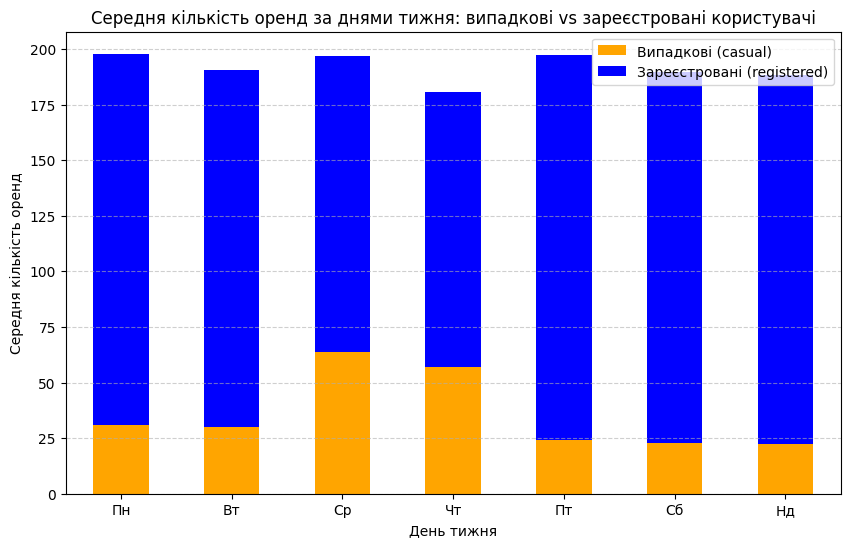

In [16]:
weekday_data = df.groupby("weekday")[["casual", "registered"]].mean()

weekday_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=["orange", "blue"]
)

plt.title("Середня кількість оренд за днями тижня: випадкові vs зареєстровані користувачі")
plt.xlabel("День тижня")
plt.ylabel("Середня кількість оренд")
plt.xticks(
    ticks=range(7),
    labels=["Пн","Вт","Ср","Чт","Пт","Сб","Нд"],
    rotation=0
)
plt.legend(["Випадкові (casual)", "Зареєстровані (registered)"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


**1. В які дні тижня більше оренд від зареєстрованих користувачів?**
У всі дні тижня кількість оренд від зареєстрованих користувачів є більшою, ніж від випадкових. Це свідчить, що саме вони формують основну частину попиту.

**2. Як можна пояснити різницю в поведінці користувачів протягом тижня?**Зареєстровані користувачі орендують велосипеди регулярно, переважно у будні, для щоденних поїздок на роботу чи навчання. Можливо випадкові користувачі частіше беруть велосипеди у вільний час, для відпочинку або розваг. Їхня активність коливається й залежить від погоди, вихідних чи святкових днів.